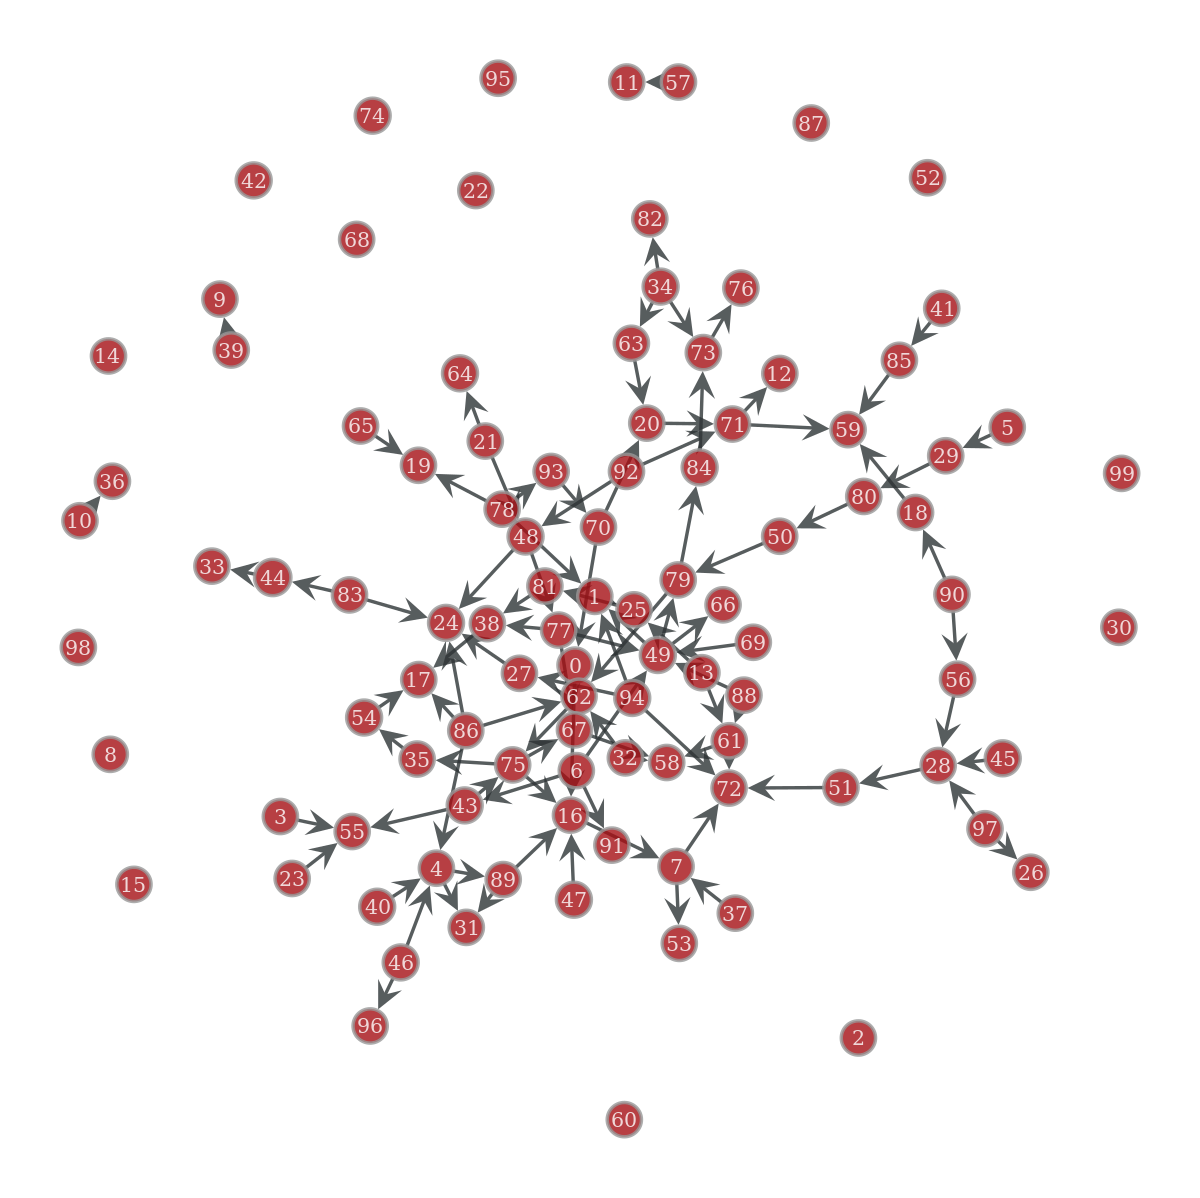

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb6b4f90630, at 0x7fb6b537be80>

In [390]:
from graph_tool.all import *
from itertools import combinations
from random import sample
from numpy.random import randint
import numpy as np
import time
from graph_tool import stats
from graph_tool import topology

np.random.seed(88)

num_nodes = 100
num_edges = 100
min_weight = 1
max_weight = 2

g = Graph()
g.add_vertex(num_nodes)
eprop_int = g.new_ep("int")
#create list of edges
for s,t in zip(randint(0, num_nodes -1 , num_edges), randint(0, num_nodes - 1, num_edges)):
  while s == t:
      s = randint(0,num_nodes-1)
      #t = randint(0,num_nodes-1)
    
  g.add_edge(g.vertex(s), g.vertex(t))

eprop_int.a = randint(min_weight, max_weight, g.num_edges())
g.ep.weights = eprop_int
#g.ep.pen_width = graph_tool.draw.prop_to_size(g.ep.weights, mi=0, ma=5, log=False, power=0.5)
#pos = arf_layout(g, weight = g.ep.weights, max_iter=1000)
pos1 = sfdp_layout(g, max_iter=1000)
graph_draw(g, pos = pos1, vertex_text=g.vertex_index) #graph_draw(g, pos = pos, vertex_text=g.vertex_index)
#could also use sfdp_layout(?) to show numbers of connections and hotspots without. relying on edge widths 


In [391]:
#pick a random vertex

vstart = randint(0, num_nodes - 1)
og = vstart
vend = randint(0, num_nodes - 1)
how_many_edge = 20
while vstart == vend:
    vend = randint(0, num_nodes - 1)
defcolor = [0.640625, 0, 0, 0.9]
highcolor = [1,10,0,1]
vpropcol = g.new_vertex_property("vector<float>")
print(vstart)
print(vend)

51
35


In [392]:
for v in g.vertices():
    vpropcol[v] = defcolor
vpropcol[vstart] = highcolor


In [393]:
mytime = 0
g.set_directed(False)
graph_draw(g, pos = pos1, vertex_text=g.vertex_index, vertex_fill_color = vpropcol, output="graphstart.png")
stats.remove_parallel_edges(g)
for i in range(1000):
    #delete random edges
    edge_size = np.size(g.get_edges([g.edge_index])[:,0:2], axis = 0)
    randidx = randint(0, edge_size - 1, 10)
    
    for x in g.get_edges([g.edge_index])[randidx, 0:2]:
        if g.edge(x[0], x[1]) == None:
            continue
        g.remove_edge(g.edge(x[0], x[1]))

    #now add random edges 
    da_edge_list = np.array(sample(list(combinations(range(1,num_nodes),2)),how_many_edge))
    randidx = randint(0, np.size(da_edge_list, axis = 0) - 1, 10)
    for x in da_edge_list[randidx, :]:
        g.add_edge(g.vertex(x[0]), g.vertex(x[1]))
    #removes muliedges                        
    stats.remove_parallel_edges(g)
    #returns path as a list of vertices (vlist)
    vlist,elist = topology.shortest_path(g, g.vertex(vstart), g.vertex(vend), weights=g.ep.weights)
    mytime += 1
    if len(vlist) == 0:
        continue

    #change colors
    vpropcol[vstart] = defcolor
    vpropcol[vlist[1]] = highcolor
    #reassign vstart
    vstart = int(vlist[1])
    ##creates file name
    my_text = "graph" + str(i)
    my_text = my_text + ".png"
    #########
    graph_draw(g, pos = pos1, vertex_text=g.vertex_index, vertex_fill_color = vpropcol, output=my_text)
    
    
    if vstart == vend: 
        break
    
    

    

In [394]:
og

51

In [395]:
vstart

35

In [396]:
vend

35

In [397]:
mytime

5